In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Sunspots.csv")

## QUESTION 1

In [3]:
data.head()

,Unnamed: 0,Date,Monthly_Mean_Total_Sunspot_Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [4]:
MMTSN=data['Monthly_Mean_Total_Sunspot_Number']

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

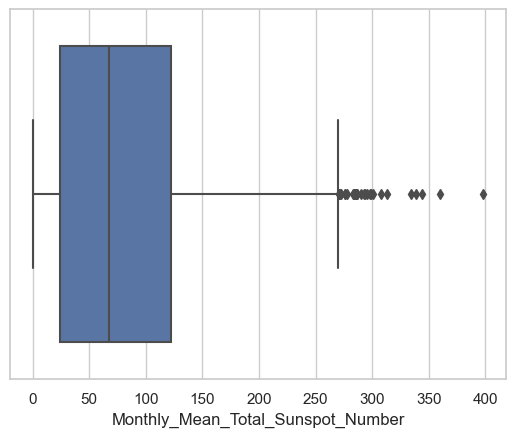

In [6]:
sns.set_theme(style="whitegrid")
ax=sns.boxplot(x=MMTSN)
plt.show()

### The minimum value from the boxplot is 0 and the maximum is around 270.  
### The lower quartile is at 25 and the upper quartile is 120.
### Median is around 65.


In [7]:
data=data[['Date','Monthly_Mean_Total_Sunspot_Number']]
data.describe()

,Monthly_Mean_Total_Sunspot_Number
count,3265.000000
mean,81.778775
std,67.889277
min,0.000000
25%,23.900000
50%,67.200000
75%,122.500000
max,398.200000


In [8]:
iqr=122.500000 - 23.900000
outlier=data[data['Monthly_Mean_Total_Sunspot_Number'] > (122.500000+(iqr*1.5))]

len(outlier)/len(data)

0.009494640122511486

#### Outliers = 0.949 %

## QUESTION 2

In [2]:
from astropy.table import Table
t1 = Table.read('Fermi_GBM_catalog_15_8_22.txt',format='ascii',guess=False, delimiter='|')
t1.info()

<Table length=3340>
          name           dtype     class     n_bad
----------------------- ------- ------------ -----
                   col0   int32 MaskedColumn  3340
                   name   str12       Column     0
                     ra   str10       Column     0
                    dec    str9       Column     0
           trigger_time   str23       Column     0
                    t90 float64 MaskedColumn     1
              t90_error float64 MaskedColumn     1
              t90_start float64 MaskedColumn     1
                fluence float64 MaskedColumn     1
          fluence_error float64 MaskedColumn     1
         flnc_band_ampl float64 MaskedColumn  1032
 flnc_band_ampl_pos_err float64 MaskedColumn  1032
 flnc_band_ampl_neg_err float64 MaskedColumn  1032
        flnc_band_epeak float64 MaskedColumn  1032
flnc_band_epeak_pos_err float64 MaskedColumn  1032
flnc_band_epeak_neg_err float64 MaskedColumn  1032
        flnc_band_alpha float64 MaskedColumn  1032
flnc_band_a

In [3]:
T90=t1['t90']
fluence =t1['fluence']

In [42]:
# B is the event of T90 < 2 sec
B=t1['t90']<2
Pb=len(t1[B])/len(t1)

#A is the event of fluence being in the order of 10^-4
lower_limit = 1e-4 - 1e-5  
upper_limit = 1e-4 + 1e-5 

A = (t1['fluence'] >= lower_limit) & (t1['fluence'] <= upper_limit)

Pa=len(t1[A])/len(t1)

In [38]:
anb=t1[A & B]

In [39]:
panb/Pb #P(A|B)

0.005389221556886228

### Probability that if we identify a GRB as short (T90 < 2 seconds), it has a fluence of the order of 10^{−4 } 𝑒𝑟𝑔/𝑐𝑚^2 is : 0.005389221556886228

## QUESTION 5

In [71]:
def q5(x):
    n=len(x)
    s=0
    for i in x:
        s=s+i
    m=s/n
    #m=np.mean(x)
    
    v=np.mean(x**2)-(np.mean(x))**2
    #v=np.var(x)
    
    #skewness
    sd=v**0.5
    sk=(np.sum((x-m)**3))/(n*(sd**3))
    
    #kurtosis
    k=(np.sum((x-m)**4)/(n*(sd**4)))-3
    
    print("Mean: ",m)
    print("Variance: ",v)
    print("Skewness: ",sk)
    print("Kurtosis: ",k)
        

In [48]:
x=np.random.uniform(size=10)
x

array([0.14197204, 0.37927682, 0.80388963, 0.63233576, 0.8783059 ,
       0.05964419, 0.94963564, 0.40357291, 0.78258505, 0.01958658])

In [72]:
q5(x)

Mean:  0.5050804525554102
Variance:  0.11115120073049772
Skewness:  -0.1720812516910004
Kurtosis:  -1.500227717929946


In [73]:
import scipy.stats as stats

In [78]:
print("Mean: ",np.mean(x))
print("Variance: ",np.var(x))
print("Skewness: ",stats.skew(x))
print("Kurtosis: ",stats.kurtosis(x))

Mean:  0.5050804525554102
Variance:  0.1111512007304977
Skewness:  -0.17208125169100041
Kurtosis:  -1.5002277179299452


## QUESTION 3

In [46]:
import numpy as np
import random

In [47]:
def f1(x,a,b):
    if x<a or x>b:
        return 0
    else:
        return 1/(b-a)

In [48]:
def expec(f,a,b,p):
    n=1000
    dx= (b-a)/n
    e=0
    for i in range(n):
        x=a+(i*dx)
        e=e+(f(x,a,b)*(x**p)*dx)
    return e

In [49]:
a=2
b=3

expec(f1,a,b,1)

2.4995

In [50]:
(3+2)/2

2.5

In [51]:
def var(f,a,b):
    n=1000
    v=expec(f,a,b,2)-(expec(f,a,b,1))**2
    return v

In [52]:
var(f1,a,b)

0.08333324999999636

In [53]:
(b-a)/(12)

0.08333333333333333

### 1,2,3 sigma zones of the given functions:

#### Uniform function

In [127]:
mu=expec(f1,a,b,1)
sd=(var(f1,a,b))**0.5

In [128]:
X=np.random.uniform(a,b,1000)

In [129]:
N = [1, 2, 3]
l = []

for n in N:
    lb = mu - (n * sd)
    ub = mu + (n * sd)
     
    sz = X[(X>=lb)&(X<=ub)]
    p=len(sz)/len(X)
    
    l.append(p)
l

[0.55, 1.0, 1.0]

#### Normal Function

In [156]:
def f2(x,sd):
    fx=(np.exp(-x**2/(2*sd**2)))/(sd*np.sqrt(2*np.pi))
    return fx

In [157]:
X_n=np.array([f2(x,1) for x in np.random.rand(10000)])

In [158]:
mu_n=np.mean(X_n)
sd_n=np.std(X_n)

In [159]:
N = [1, 2, 3]
l_n = []

for n in N:
    lb = mu_n - (n * sd_n)
    ub = mu_n + (n * sd_n)
     
    sz_n = X_n[(X_n>=lb)&(X_n<=ub)]
    p_n=len(sz_n)/len(X_n)
    
    l_n.append(p_n)
l_n

[0.5709, 0.9844, 1.0]

#### Function 3

In [144]:
def f3(x0, x, p):
    f= (p/2)/(np.pi*((x-x0)**2+(p/2)**2))
    return(f)

In [145]:
X_3=np.array([f3(0,x,1) for x in np.linspace(-100,100,1000000)])

In [146]:
mu_3=np.mean(X_3)
sd_3=np.std(X_3)

In [147]:
N = [1, 2, 3]
l_3 = []

for n in N:
    lb = mu_3 - (n * sd_3)
    ub = mu_3 + (n * sd_3)
     
    sz_3 = X_3[(X_3>=lb)&(X_3<=ub)]
    p_3=len(sz_3)/len(X_3)
    
    l_3.append(p_3)
l_3

[0.981776, 0.987188, 0.98982]

## QUESTION 6

def mom(f,a,b,p):
    n=1000
    dx= (b-a)/n
    m=0
    for i in range(n):
        x=a+(i*dx)
        m=m+(f(x,a,b)*(x**p)*dx)
    return m

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace, uniform

In [32]:
def mom(x, p):
    if p == 1:
        return np.mean(x)
    elif p == 2:
        return np.mean((x - np.mean(x))**p)
    else:
        return np.mean(((x - np.mean(x)) / np.std(x))**p)

In [33]:
np.random.seed(0)
sample_size = 1000

normal_mean = 0
normal_std_dev = 1
normal_samples = np.random.normal(normal_mean, normal_std_dev, sample_size)

laplace_loc = 0
laplace_scale = 1 / np.sqrt(2)
laplace_samples = np.random.laplace(laplace_loc, laplace_scale, sample_size)

uniform_a = -np.sqrt(3)
uniform_b = np.sqrt(3)
uniform_samples = np.random.uniform(uniform_a, uniform_b, sample_size)


moment_orders = [1, 2, 3, 4]

print("             normal_moment   |   laplace_moment  | uniform_moment")
for p in moment_orders:
    normal_moment = mom(normal_samples, p)
    laplace_moment = mom(laplace_samples, p)
    uniform_moment = mom(uniform_samples, p)
    print("Moment-",p,": ",round(normal_moment,4),"     |       " , round(laplace_moment,4),"     |       " , round(uniform_moment,4))



             normal_moment   |   laplace_moment  | uniform_moment
Moment- 1 :  -0.0453      |        0.035      |        0.0092
Moment- 2 :  0.9742      |        1.0584      |        1.0027
Moment- 3 :  0.0339      |        -0.2484      |        0.0251
Moment- 4 :  2.9532      |        6.2196      |        1.7879


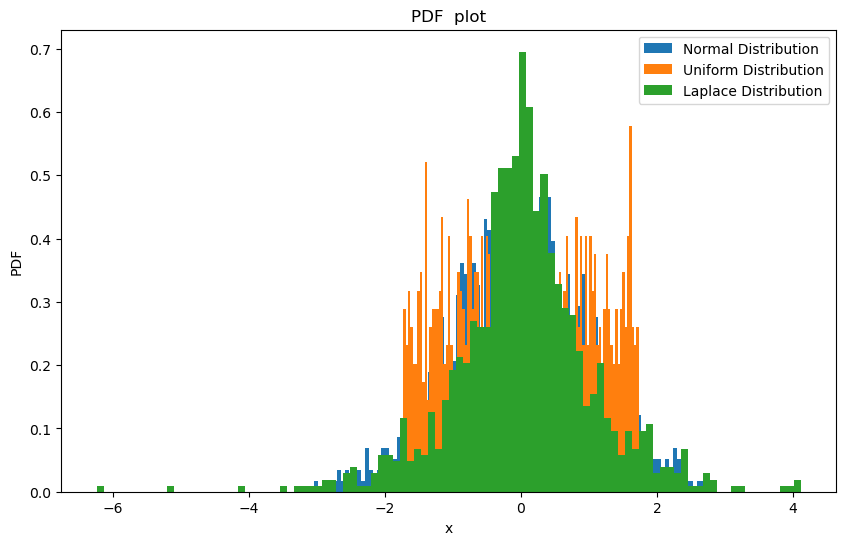

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(normal_samples,bins=100,density=True, label='Normal Distribution')
plt.hist(uniform_samples,bins=100,density=True,label='Uniform Distribution')
plt.hist(laplace_samples,bins=100, density=True,label='Laplace Distribution')
plt.title('PDF  plot')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

plt.show()

##### Laplacian distribution is more tailed 